In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score , classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
#!pip install nltk

In [3]:
ds=pd.read_csv("SMSSpamCollection",sep='\t',header=None,names=['label','message'])

In [4]:
ds.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
ds.shape

(5572, 2)

In [7]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RHIU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
sent = 'Hello friends! How are you?'

In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\RHIU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [10]:
word_tokenize(sent)

['Hello', 'friends', '!', 'How', 'are', 'you', '?']

In [11]:
swords = stopwords.words('english')

In [12]:
swords

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [13]:
clean=[word for word in word_tokenize(sent)if word not in swords]

In [14]:
clean

['Hello', 'friends', '!', 'How', '?']

In [15]:
ps=PorterStemmer()

In [16]:
clean = (ps.stem(word) for word in word_tokenize(sent)if word not in swords)

In [17]:
print(list(clean))

['hello', 'friend', '!', 'how', '?']


In [18]:
sent='so my fellow followeres , bow to me and perish at my will'

In [19]:
def clean_text(sent):
    tokens = word_tokenize(sent)
    clean = [word.lower() for word in tokens if word.isalpha()]
    clean = [ps.stem(word) for word in clean if word not in swords]
    return clean

In [20]:
cleaned = clean_text(sent)
print(cleaned)

['fellow', 'follower', 'bow', 'perish']


In [21]:
tfidf = TfidfVectorizer(analyzer=clean_text)
X = ds['message']
Y = ds['label']
X_new = tfidf.fit_transform(X)

In [22]:
X.shape

(5572,)

In [23]:
X_new.shape

(5572, 5925)

In [24]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X_new,Y,random_state=0,test_size=0.25)

In [25]:
print(Xtrain.shape)
print(Xtest.shape)

(4179, 5925)
(1393, 5925)


In [26]:
NB = GaussianNB()

In [27]:
NB.fit(Xtrain.toarray(),Ytrain)

GaussianNB()

In [28]:
YNB = NB.predict(Xtest.toarray()) 

In [29]:
Ytest.value_counts()

label
ham     1208
spam     185
Name: count, dtype: int64

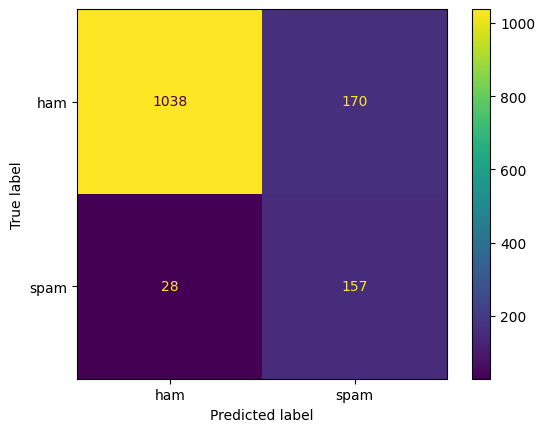

In [30]:
ConfusionMatrixDisplay.from_predictions(Ytest,YNB)

In [31]:
print(f'accuracy score : {accuracy_score(Ytest,YNB)}')
print(classification_report(Ytest,YNB))

accuracy score : 0.8578607322325915
              precision    recall  f1-score   support

         ham       0.97      0.86      0.91      1208
        spam       0.48      0.85      0.61       185

    accuracy                           0.86      1393
   macro avg       0.73      0.85      0.76      1393
weighted avg       0.91      0.86      0.87      1393



In [32]:
RF = RandomForestClassifier(n_estimators = 100,random_state = 0)
RF.fit(Xtrain.toarray(),Ytrain)
YRF = RF.predict(Xtest.toarray())

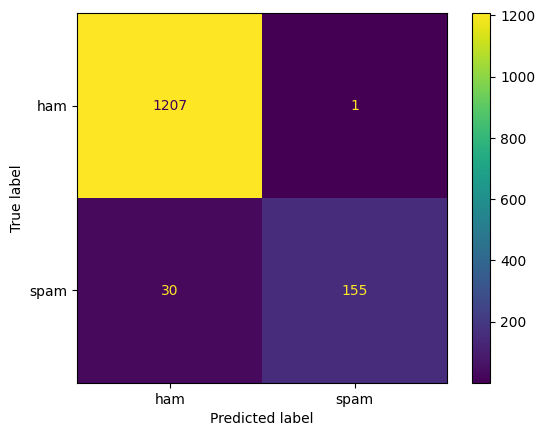

In [33]:
ConfusionMatrixDisplay.from_predictions(Ytest,YRF)

In [34]:
print(f'accuracy score : {accuracy_score(Ytest,YRF)}')
print(classification_report(Ytest,YRF))

accuracy score : 0.9777458722182341
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1208
        spam       0.99      0.84      0.91       185

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [35]:
LR = LogisticRegression()
LR.fit(Xtrain.toarray(),Ytrain)
YLR = LR.predict(Xtest.toarray())

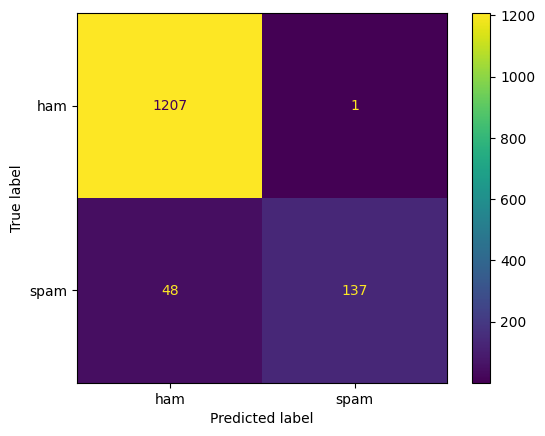

In [36]:
ConfusionMatrixDisplay.from_predictions(Ytest,YLR)

In [37]:
print(f'accuracy score : {accuracy_score(Ytest,YLR)}')
print(classification_report(Ytest,YLR))

accuracy score : 0.964824120603015
              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1208
        spam       0.99      0.74      0.85       185

    accuracy                           0.96      1393
   macro avg       0.98      0.87      0.91      1393
weighted avg       0.97      0.96      0.96      1393

